In [131]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [200]:
class self_accelerated_TS(object):
    def __init__(self,K,d,T,lam,sigma,X):
        #input: K - number of arms, d - dimensions, T - number of rounds ,and lam - regularizer term 
        self.K = K
        self.d = d
        self.T = T
        self.lam = lam
        self.sigma = sigma
        #step up contextual bandit environment
        self.X = X
        self.theta_star = np.random.multivariate_normal(np.zeros(self.d),np.identity(self.d))
        self.mu = np.matmul(self.X,self.theta_star)
        self.best_arm = np.argmax(self.mu)
        #Init step
        self.r_x = np.zeros(K)
        self.N_x = np.zeros(K)
        self.f = np.zeros(self.d)
        self.V = self.lam*np.identity(self.d)
        self.Vinv = np.linalg.inv(self.V)
        self.theta_hat = np.matmul(self.Vinv,self.f)
    
    def argmax(self,b):
        return np.random.choice(np.where(b == b.max())[0])
    
    def run(self):
        self.regret = np.zeros(self.T)
        self.ins_regret = np.zeros(self.T)
        reg = 0.0
        for t in range(1,self.T+1):
            self.theta_tilde = np.random.multivariate_normal(self.theta_hat,self.Vinv)
            for i in range(K):
                if self.N_x[i] == 0:
                    self.r_bar = np.inner(self.X[i],self.theta_hat)
            inner = np.add(np.matmul(self.X,self.theta_tilde), self.r_x)
            x = self.argmax(inner)
            r = np.random.normal(self.mu[x],self.sigma)
            self.f = self.f + self.X[x]*r
            self.V = self.V + np.outer(self.X[x],self.X[x])
            self.Vinv = np.linalg.inv(self.V)
            self.theta_hat = np.matmul(self.Vinv,self.f)
            self.r_x[x] = (self.N_x[x]*self.r_x[x]+r)/(self.N_x[x] + 1)
            self.N_x[x] += 1
            reg += (self.mu[self.best_arm] - self.mu[x])
            self.regret[t-1] = reg
            self.ins_regret[t-1] = (self.mu[self.best_arm] - self.mu[x])

In [229]:
K = 70
d = 10
T = 30000
lam = 1.0
sigma = 1.0
regret = np.zeros(T)
ins_regret = np.zeros(T)
runs = 50
X = np.random.multivariate_normal(np.zeros(d),1.0*np.identity(d),size=(K))
for i in tqdm(range(runs)):
    agent = self_accelerated_TS(K,d,T,lam,sigma,X)
    agent.run()
    regret += agent.regret
    ins_regret += agent.ins_regret

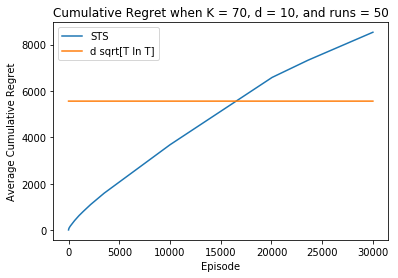

In [230]:
plt.title("Cumulative Regret when K = "+str(K)+", d = "+str(d)+", and runs = "+str(runs))
plt.xlabel("Episode")
plt.ylabel("Average Cumulative Regret")
plt.plot(regret/runs,label='STS')
plt.plot(np.ones(T)*d*np.sqrt(T*np.log(T)),label = 'd sqrt[T ln T]')
plt.legend()
plt.savefig("SATS_Cumulative_Regret_"+str(T)+"_arms_"+str(K)+".pdf")

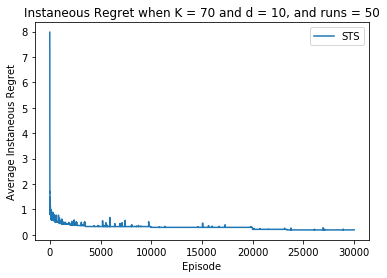

In [231]:
plt.title("Instaneous Regret when K = "+str(K)+" and d = "+str(d)+ ", and runs = " +str(runs))
plt.xlabel("Episode")
plt.ylabel("Average Instaneous Regret")
plt.plot(ins_regret/runs,label='STS')
plt.legend()
plt.savefig("SATS_instant_regret_"+str(T)+"_arms_"+str(K)+".pdf")

In [198]:
X = np.random.multivariate_normal(np.zeros(d),0.05*np.identity(d),size=(K))
print(np.linalg.norm(X,axis=1))

[0.95694053 0.76668501 0.65322811 0.37377081 0.82992197 0.74921711
 0.5470367  0.85295394 0.50814771 0.84707606 0.77902443 0.72919478
 0.77613693 0.48131609 0.94614066 0.67869144 0.6334378  0.62469111
 0.7238115  0.72032093 1.00995352 0.54171329 0.7749114  0.59702983
 0.45147592 0.33050606 0.59057417 0.66371388 0.89056159 0.76962581
 0.91491787 0.73036629 0.80944987 0.4979086  0.70228624 0.75697715
 0.84548444 0.6260882  0.92108766 0.66744924 0.83294816 0.78636907
 0.52160688 0.77485611 0.58847125 0.45571289 0.68005219 0.84018798
 0.65744701 0.73646543 0.8210288  0.7480061  0.88908197 0.5923469
 0.6618276  0.89857993 0.64592306 0.82427349 1.01117428 0.83995382]
